<a href="https://colab.research.google.com/github/devtico/concretequality/blob/master/concrete_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly==4.3.0
!!pip install dtreeviz
import pandas as pd
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV
import dtreeviz.trees as trv
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.metrics as metrics

In [ ]:
bd = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [ ]:
cols = ["cement", "blast_fur", "fly_ash", "water", "super", "coar_agg", "fine_agg", "age", "conc_comp"]

In [ ]:
bd.columns = cols

#Análise exploratória

In [ ]:
bd

,cement,blast_fur,fly_ash,water,super,coar_agg,fine_agg,age,conc_comp
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
bd.describe()

,cement,blast_fur,fly_ash,water,super,coar_agg,fine_agg,age,conc_comp
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
bd_melt = bd.melt()

In [ ]:
bd_melt

,variable,value
0,cement,540.000000
1,cement,540.000000
2,cement,332.500000
3,cement,332.500000
4,cement,198.600000
...,...,...
9265,conc_comp,44.284354
9266,conc_comp,31.178794
9267,conc_comp,23.696601
9268,conc_comp,32.768036


In [ ]:
px.histogram(bd_melt, x = 'value', y = 'variable', facet_col='variable', color='variable', facet_col_wrap=3, nbins=50)

In [ ]:
px.scatter_matrix(bd, height=1000)

Dados com escala ajustada

In [ ]:
reesc = scale(bd)

In [ ]:
df_reesc = pd.DataFrame(reesc, columns=cols)

In [ ]:
reesc_melt = df_reesc.melt()

In [ ]:
px.histogram(reesc_melt, x = 'value', y = 'variable', facet_col='variable', color='variable', facet_col_wrap=3, nbins=30)

#Treino

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
        bd.iloc[:,0:8], bd["conc_comp"], 
        test_size=0.2, random_state=1234)

In [ ]:
model_one = DecisionTreeRegressor(min_samples_leaf=25,
                                      min_impurity_decrease=0.01,
                                      random_state=1234)
model_one.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.01,
                      min_impurity_split=None, min_samples_leaf=25,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

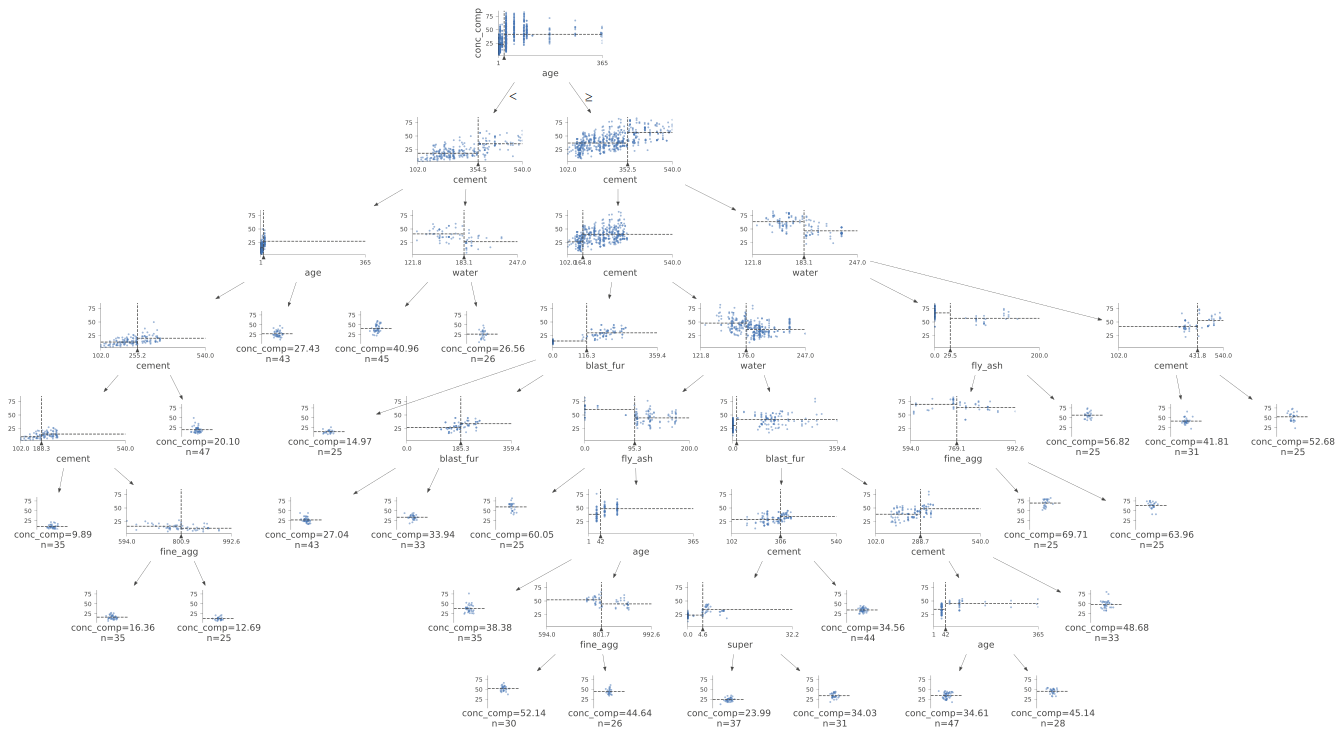

In [ ]:
viz = trv.dtreeviz(model_one, 
                   x_train,
                   y_train,  
                   target_name="conc_comp",
                   feature_names=bd.iloc[:, 0:8].columns);
viz

In [ ]:
predicao = model_one.predict(x_test)

In [ ]:
metrics.mean_absolute_error(y_test, predicao)

6.433211543337944

#Otimização do modelo

In [ ]:
parametros = {"min_samples_leaf": [10, 20, 30 ,40, 50 ,60, 70, 80, 90, 100],
              "min_impurity_decrease": [0.1, 0.5, 1, 2, 3, 4, 5, 10],
              "splitter": ["best", "random"],
              "max_depth": [3, 4, 5, None],
              "criterion": ["mae"]}
scoring = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)
model_opt = GridSearchCV(model_one, parametros, 
                         cv=5,
                         iid=False,
                         scoring=scoring)
model_opt.fit(x_train, y_train);

In [ ]:
model_opt.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

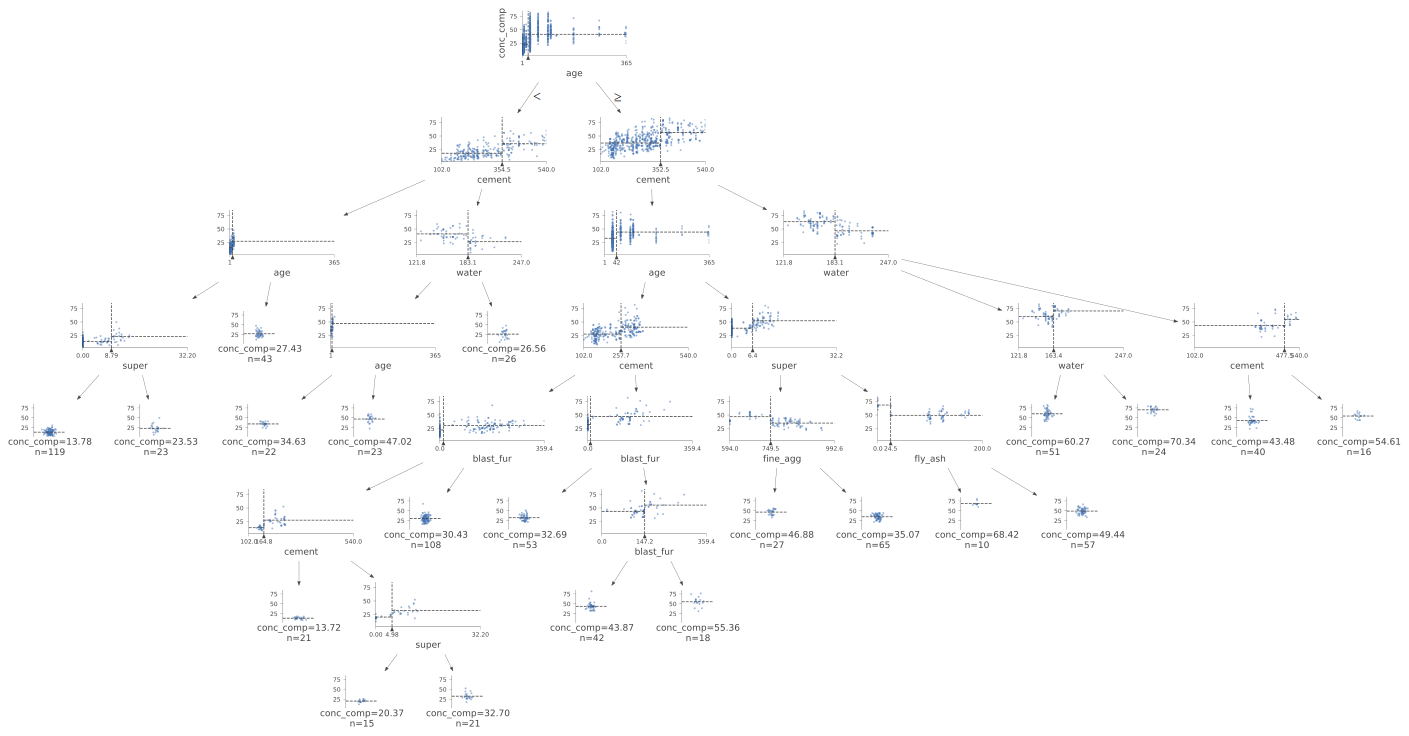

In [ ]:
viz = trv.dtreeviz(model_opt.best_estimator_, 
                   x_train,
                   y_train,  
                   target_name="conc_comp",
                   feature_names=bd.iloc[:, 0:8].columns);
viz

In [ ]:
predicao = model_opt.predict(x_test)

In [ ]:
metrics.mean_absolute_error(y_test, predicao)

6.123236834148259